In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import preprocessing
import pylab as pl
from sklearn import decomposition
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as hc

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


In [14]:
tfidf_df = pd.read_csv("tfidf_vectorized_dataset.csv")

In [15]:
tfidf_df.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mixed Opinions
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation


In [24]:
df_unlabeled = tfidf_df.drop(columns=["Label"])
df_normalized = preprocessing.normalize(df_unlabeled)


In [18]:
My_KMean= KMeans(n_clusters=3)
My_KMean.fit(df_unlabeled)
My_labels=My_KMean.predict(df_unlabeled)
print("Silhouette Score for k=3: ", silhouette_score(df_unlabeled, My_labels))


Silhouette Score for k=3:  0.007994015840946304


In [20]:
My_KMean2= KMeans(n_clusters=4).fit(preprocessing.normalize(df_unlabeled))
My_KMean2.fit(df_unlabeled)
My_labels2=My_KMean2.predict(df_unlabeled)
print("Silhouette Score for k=4: ", silhouette_score(df_unlabeled, My_labels2))

Silhouette Score for k=4:  0.01013001968683713


In [22]:
My_KMean3= KMeans(n_clusters=5).fit(preprocessing.normalize(df_unlabeled))
My_KMean3.fit(df_unlabeled)
My_labels3=My_KMean3.predict(df_unlabeled)
print("Silhouette Score for k=4: ", silhouette_score(df_unlabeled, My_labels3))

Silhouette Score for k=4:  0.010748234788673082


In [25]:
k_values = [3, 4, 5]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_normalized)
    my_labels = kmeans.predict(df_normalized)
    sil_score = silhouette_score(df_normalized, my_labels)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score: {sil_score:.4f}")


K=3, Silhouette Score: 0.0111
K=4, Silhouette Score: 0.0113
K=5, Silhouette Score: 0.0131


K=3, Silhouette Score: 0.1702
K=4, Silhouette Score: -0.0270
K=5, Silhouette Score: -0.0240


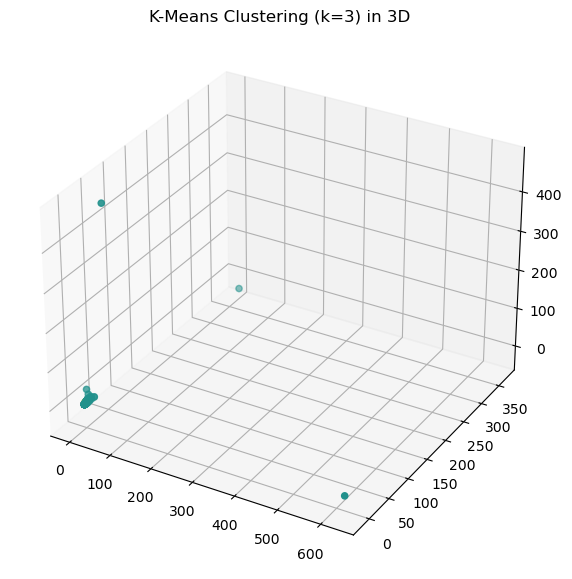

In [11]:
k_values = [3, 4, 5]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score: {sil_score:.4f}")

# Choose the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
tfidf_df['KMeans_Cluster'] = kmeans_final.fit_predict(df_scaled)

# PCA for Visualization (Reduce to 3D)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = tfidf_df['KMeans_Cluster']

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis')
plt.title(f"K-Means Clustering (k={best_k}) in 3D")
plt.show()

In [12]:
tfidf_df.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label,KMeans_Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mixed Opinions,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation,1


In [13]:
print(tfidf_df['KMeans_Cluster'].value_counts())  # Should only show counts for [0,1,2]


KMeans_Cluster
1    824
2      1
0      1
Name: count, dtype: int64
